In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
f = open('hurriyet.txt', 'r', encoding = 'utf8')
text = f.read()
t_list = text.split('\n')

corpus = []
for cumle in t_list:
    corpus.append(cumle.split())

In [3]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [4]:
model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1)

In [5]:
model.wv['ankara']

array([-6.29693508e-01, -8.59159380e-02,  9.56386805e-01, -6.52873442e-02,
        1.17762513e-01, -1.36815578e-01, -3.42599124e-01, -9.92435664e-02,
       -8.76270354e-01,  1.03776090e-01, -1.99380368e-02,  1.06009156e-01,
        8.82572681e-03, -1.75375611e-01,  1.54099435e-01,  3.30159575e-01,
       -1.37244761e-01,  3.72013837e-01, -8.93473253e-02,  2.36352533e-02,
       -2.31305480e-01,  8.71426687e-02,  3.17075789e-01,  6.63698196e-01,
       -1.56918630e-01,  3.03731740e-01, -2.01040655e-01,  3.28505129e-01,
       -5.12934506e-01,  1.83470547e-01, -1.25409827e-01, -3.80120546e-01,
        4.56431687e-01,  3.18087131e-01,  1.97751045e-01, -4.03218240e-01,
       -2.18979567e-01, -1.80094868e-01, -9.19346735e-02, -5.39985120e-01,
        2.69915730e-01,  6.86774433e-01,  1.86371446e-01, -3.20643663e-01,
       -1.34849682e-01, -1.39806256e-01, -5.52165732e-02,  5.17641485e-01,
       -2.45732188e-01, -7.29143247e-02,  4.57021654e-01, -2.48038828e-01,
        6.54532313e-02,  

In [6]:
model.wv.most_similar('hollanda')

[('avusturya', 0.8263012170791626),
 ('danimarka', 0.8036960363388062),
 ('belçika', 0.7992688417434692),
 ('kanada', 0.7709043025970459),
 ('almanya', 0.7653361558914185),
 ('ispanya', 0.7505944967269897),
 ('finlandiya', 0.7471174597740173),
 ('letonya', 0.7308926582336426),
 ('italya', 0.7275201082229614),
 ('fransa', 0.7174783945083618)]

In [7]:
model.wv.most_similar('pazartesi')

[('perşembe', 0.9383319616317749),
 ('cumartesi', 0.9210575819015503),
 ('salı', 0.9094676375389099),
 ('çarşamba', 0.9035134315490723),
 ('cuma', 0.8930109739303589),
 ('günü', 0.8891835808753967),
 ('akşamı', 0.8435043096542358),
 ('pazar', 0.8312453031539917),
 ('sabahı', 0.8161305785179138),
 ('gününden', 0.7496998310089111)]

In [8]:
model.wv.most_similar('youtube')

[('twitter', 0.7440274953842163),
 ('facebook', 0.7269213199615479),
 ('twıtter', 0.7240245342254639),
 ('internete', 0.7141238451004028),
 ('whatsapp', 0.7116800546646118),
 ('paylaşım', 0.7091689109802246),
 ('sitelerine', 0.7046252489089966),
 ('sayfasına', 0.7014592289924622),
 ('video', 0.6816192865371704),
 ('ınstagram', 0.6785684823989868)]

In [9]:
model.save('word2vec.model')

In [10]:
model = Word2Vec.load('word2vec.model')

In [13]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0, 100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
    
    plt.show()

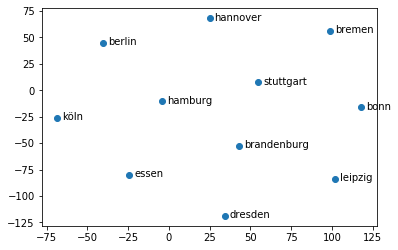

In [14]:
closestwords_tsneplot(model, 'berlin')

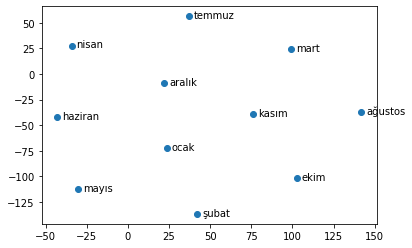

In [15]:
closestwords_tsneplot(model, 'temmuz')

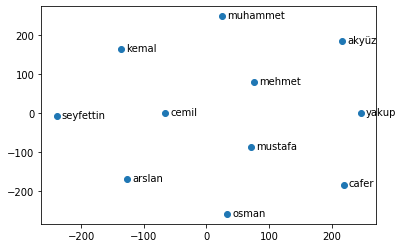

In [16]:
closestwords_tsneplot(model, 'mustafa')

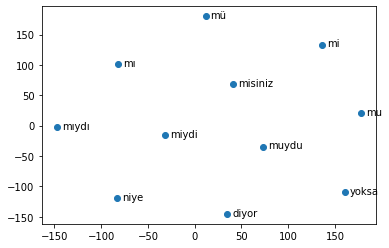

In [17]:
closestwords_tsneplot(model, 'mu')